# Assignment - Weather and Citipy
Here, the flow is to find unique latitude and longitude coordinates. Then from Citipy, unique city names are identified.
For the list of Cities on weather api, key attitubute (temprature, humidity, wind speed and cloudiness) values are fetched.
I also have a scatter plot to show a range of coordinates across multiple locations.

Limitation: 
1. Some City names on Citipy dont exist on Weather app. To handle this, I am fetching 575 city names from which I will drop the cities not on weather app. Hence, I will have a little more than 500 city names in the list.
2. Inspite of restricting the duplicate city names, there are still a few. I have introduced a function later to delete duplicate cities.   

In [1]:
# Import all Dependencies
import random
import requests
import pandas as pd
import time
from time import strftime, gmtime
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from config import api_key
from citipy import citipy
import numpy as np
import csv
from PIL import Image

To Find the unique cities by latitude, longitude and different distances fro the equator
    - generate a random float between -180 and 180 as the latitude(equator) coordinate not in the list
    - generate a random float between -90 and -90 as the longitude coordinate (duplicates are ok as the latitude is unique)
    - find key attitubes for the city list from weather app

In [3]:
cityname1 = {"Latitude":[],"Longitude":[],"City":[],"Temperature":[],"Humidity":[],"Cloudiness":[],"Wind Speed":[]}
citycoordinates = []
lat1 =[]

while (len(citycoordinates)<=575):
    tempLat = random.uniform(-180,180)
    if tempLat not in lat1:
        lat1.append(tempLat)
        tempLon = random.uniform(-90,90)
    else:
        pass
    tempcity = citipy.nearest_city(tempLat, tempLon)
    if tempcity not in citycoordinates:
        citycoordinates.append(tempcity)
        name = tempcity.city_name
        cityname1["City"].append(name)
        cityname1["Latitude"].append(tempLat)
        cityname1["Longitude"].append(tempLon)
    else:
        pass

For the city list, get key attirute value from weathermap
    - included a start and close time to check runtime
    - for cities not found on weather map, pass blank values to be handled later

In [4]:
start_time = time.time()
index = 1
for city in cityname1["City"]:
    url = "http://api.openweathermap.org/data/2.5/weather?&q="
    query_url = url + city + "&units=imperial&appid=" + api_key
    response = requests.get(query_url).json()
    status_code = response['cod']
    
    if status_code == 200:
        cityname1["Temperature"].append(response['main']['temp'])
        cityname1["Humidity"].append(response['main']['humidity'])
        cityname1["Cloudiness"].append(response['clouds']['all'])
        cityname1["Wind Speed"].append(response['wind']['speed'])
        print(index, "City count , City Id: ", response["id"])
        print("City Name: " , response["name"])
        print(query_url)
        index += 1
        time.sleep(1)
    else:
        cityname1["Temperature"].append("")
        cityname1["Humidity"].append("")
        cityname1["Cloudiness"].append("")
        cityname1["Wind Speed"].append("")
print("--- %s seconds ---" % (time.time() - start_time))

1 City count , City Id:  3418910
City Name:  Upernavik
http://api.openweathermap.org/data/2.5/weather?&q=upernavik&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
2 City count , City Id:  1507390
City Name:  Dikson
http://api.openweathermap.org/data/2.5/weather?&q=dikson&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
3 City count , City Id:  4501427
City Name:  Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?&q=port elizabeth&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
4 City count , City Id:  3366880
City Name:  Hermanus
http://api.openweathermap.org/data/2.5/weather?&q=hermanus&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
5 City count , City Id:  3833367
City Name:  Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
6 City count , City Id:  2514651
City Name:  Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?&q=los llanos de aridane&units=imperial&app

50 City count , City Id:  5106834
City Name:  Albany
http://api.openweathermap.org/data/2.5/weather?&q=albany&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
51 City count , City Id:  1490085
City Name:  Tarko-Sale
http://api.openweathermap.org/data/2.5/weather?&q=tarko-sale&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
52 City count , City Id:  3452599
City Name:  Posse
http://api.openweathermap.org/data/2.5/weather?&q=posse&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
53 City count , City Id:  2448085
City Name:  Agadez
http://api.openweathermap.org/data/2.5/weather?&q=agadez&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
54 City count , City Id:  3378644
City Name:  Georgetown
http://api.openweathermap.org/data/2.5/weather?&q=georgetown&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
55 City count , City Id:  3119841
City Name:  A Coruna
http://api.openweathermap.org/data/2.5/weather?&q=a coruna&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c775

99 City count , City Id:  474603
City Name:  Verkhnyaya Maksakovka
http://api.openweathermap.org/data/2.5/weather?&q=verkhnyaya maksakovka&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
100 City count , City Id:  2409215
City Name:  Mattru
http://api.openweathermap.org/data/2.5/weather?&q=mattru&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
101 City count , City Id:  3372472
City Name:  Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?&q=vila franca do campo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
102 City count , City Id:  1497917
City Name:  Nefteyugansk
http://api.openweathermap.org/data/2.5/weather?&q=nefteyugansk&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
103 City count , City Id:  6316343
City Name:  Alta Floresta
http://api.openweathermap.org/data/2.5/weather?&q=alta floresta&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
104 City count , City Id:  2381334
City Name:  Atar
http://api.openweathermap.org/data/2.5/we

148 City count , City Id:  3674735
City Name:  Miraflores
http://api.openweathermap.org/data/2.5/weather?&q=miraflores&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
149 City count , City Id:  3374083
City Name:  Bathsheba
http://api.openweathermap.org/data/2.5/weather?&q=bathsheba&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
150 City count , City Id:  5983720
City Name:  Iqaluit
http://api.openweathermap.org/data/2.5/weather?&q=iqaluit&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
151 City count , City Id:  3443061
City Name:  Chuy
http://api.openweathermap.org/data/2.5/weather?&q=chuy&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
152 City count , City Id:  3939761
City Name:  Hualmay
http://api.openweathermap.org/data/2.5/weather?&q=hualmay&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
153 City count , City Id:  1525988
City Name:  Ayagoz
http://api.openweathermap.org/data/2.5/weather?&q=ayagoz&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7

197 City count , City Id:  3887127
City Name:  Iquique
http://api.openweathermap.org/data/2.5/weather?&q=iquique&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
198 City count , City Id:  3910343
City Name:  Mineros
http://api.openweathermap.org/data/2.5/weather?&q=mineros&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
199 City count , City Id:  2236967
City Name:  Soyo
http://api.openweathermap.org/data/2.5/weather?&q=soyo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
200 City count , City Id:  3384937
City Name:  Miracema do Tocantins
http://api.openweathermap.org/data/2.5/weather?&q=miracema do tocantins&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
201 City count , City Id:  3694112
City Name:  Paita
http://api.openweathermap.org/data/2.5/weather?&q=paita&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
202 City count , City Id:  1512205
City Name:  Abaza
http://api.openweathermap.org/data/2.5/weather?&q=abaza&units=imperial&appid=9c4bb9576cd41932b

246 City count , City Id:  3031871
City Name:  Veraval
http://api.openweathermap.org/data/2.5/weather?&q=veraval&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
247 City count , City Id:  6166142
City Name:  Thunder Bay
http://api.openweathermap.org/data/2.5/weather?&q=thunder bay&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
248 City count , City Id:  151567
City Name:  Nguruka
http://api.openweathermap.org/data/2.5/weather?&q=nguruka&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
249 City count , City Id:  1082243
City Name:  Ambilobe
http://api.openweathermap.org/data/2.5/weather?&q=ambilobe&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
250 City count , City Id:  6322184
City Name:  Porto Novo
http://api.openweathermap.org/data/2.5/weather?&q=porto novo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
251 City count , City Id:  1505579
City Name:  Inta
http://api.openweathermap.org/data/2.5/weather?&q=inta&units=imperial&appid=9c4bb9576cd41932b37e7e

295 City count , City Id:  3860443
City Name:  Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?&q=comodoro rivadavia&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
296 City count , City Id:  1067565
City Name:  Beloha
http://api.openweathermap.org/data/2.5/weather?&q=beloha&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
297 City count , City Id:  1516438
City Name:  Zyryanovsk
http://api.openweathermap.org/data/2.5/weather?&q=zyryanovsk&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
298 City count , City Id:  466060
City Name:  Yuzhno-Sukhokumsk
http://api.openweathermap.org/data/2.5/weather?&q=yuzhno-sukhokumsk&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
299 City count , City Id:  2228881
City Name:  Issenye
http://api.openweathermap.org/data/2.5/weather?&q=issenye&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
300 City count , City Id:  3351663
City Name:  Benguela
http://api.openweathermap.org/data/2.5/weather?&q=benguela&units

344 City count , City Id:  2460954
City Name:  Araouane
http://api.openweathermap.org/data/2.5/weather?&q=araouane&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
345 City count , City Id:  2399371
City Name:  Makokou
http://api.openweathermap.org/data/2.5/weather?&q=makokou&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
346 City count , City Id:  244878
City Name:  Biltine
http://api.openweathermap.org/data/2.5/weather?&q=biltine&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
347 City count , City Id:  3404558
City Name:  Cabedelo
http://api.openweathermap.org/data/2.5/weather?&q=cabedelo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
348 City count , City Id:  601551
City Name:  Akdepe
http://api.openweathermap.org/data/2.5/weather?&q=akdepe&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
349 City count , City Id:  4944903
City Name:  Nantucket
http://api.openweathermap.org/data/2.5/weather?&q=nantucket&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5

393 City count , City Id:  3691582
City Name:  Talara
http://api.openweathermap.org/data/2.5/weather?&q=talara&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
394 City count , City Id:  464790
City Name:  Zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?&q=zapolyarnyy&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
395 City count , City Id:  689198
City Name:  Kyrylivka
http://api.openweathermap.org/data/2.5/weather?&q=kyrylivka&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
396 City count , City Id:  605155
City Name:  Kiruna
http://api.openweathermap.org/data/2.5/weather?&q=kiruna&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
397 City count , City Id:  3698359
City Name:  Chicama
http://api.openweathermap.org/data/2.5/weather?&q=chicama&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
398 City count , City Id:  3601874
City Name:  San Matias
http://api.openweathermap.org/data/2.5/weather?&q=san matias&units=imperial&appid=9c4bb9576cd41932b37e

442 City count , City Id:  2561668
City Name:  Agadir
http://api.openweathermap.org/data/2.5/weather?&q=agadir&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
443 City count , City Id:  1485312
City Name:  Zdvinsk
http://api.openweathermap.org/data/2.5/weather?&q=zdvinsk&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
444 City count , City Id:  921786
City Name:  Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?&q=mitsamiouli&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
445 City count , City Id:  1489962
City Name:  Tavda
http://api.openweathermap.org/data/2.5/weather?&q=tavda&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
446 City count , City Id:  615844
City Name:  Akhmeta
http://api.openweathermap.org/data/2.5/weather?&q=akhmeta&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
447 City count , City Id:  376332
City Name:  Doka
http://api.openweathermap.org/data/2.5/weather?&q=doka&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
448 C

491 City count , City Id:  3466307
City Name:  Chapada dos Guimaraes
http://api.openweathermap.org/data/2.5/weather?&q=chapada dos guimaraes&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
492 City count , City Id:  3404722
City Name:  Buriti Bravo
http://api.openweathermap.org/data/2.5/weather?&q=buriti bravo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
493 City count , City Id:  863061
City Name:  Usinsk
http://api.openweathermap.org/data/2.5/weather?&q=usinsk&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
494 City count , City Id:  3391889
City Name:  Pitimbu
http://api.openweathermap.org/data/2.5/weather?&q=pitimbu&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
495 City count , City Id:  3868633
City Name:  Vallenar
http://api.openweathermap.org/data/2.5/weather?&q=vallenar&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
496 City count , City Id:  3448903
City Name:  Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?&q=sao joao da b

In [5]:
# Convert list to DataFrame and included a count check for number of values

cityname1 = pd.DataFrame(cityname1)
len(cityname1)

576

In [6]:
# For cities not found on weatherapp, replace blank with NaN an then delete these rows. Included a count check for number of cities

cityname1['Cloudiness'].replace('', np.nan, inplace=True)
cityname1.dropna(subset=['Cloudiness'], inplace=True)
len(cityname1)

503

In [7]:
# Dropping duplicate city names and included a count check for number of cities

cityname1 = cityname1.drop_duplicates(["City"])
len(cityname1)

502

In [8]:
# Convert wind speed rendered as mps to mph
# Save dataframe to CSV file

cityname1["Wind Speed"] = cityname1["Wind Speed"] *60
cityname1.to_csv('Results.csv', sep=',', encoding='utf-8',index=False)

In [9]:
# get current time to add to graph titles

CurDate = strftime("%d %b %Y", gmtime())
CurDate

'26 May 2018'

In the scatter plot below, the temperature vs Latitude is depicted to check the spread.
## Conclusion: Since it is summer, the temperature is warmer for majority of cities close to the equator

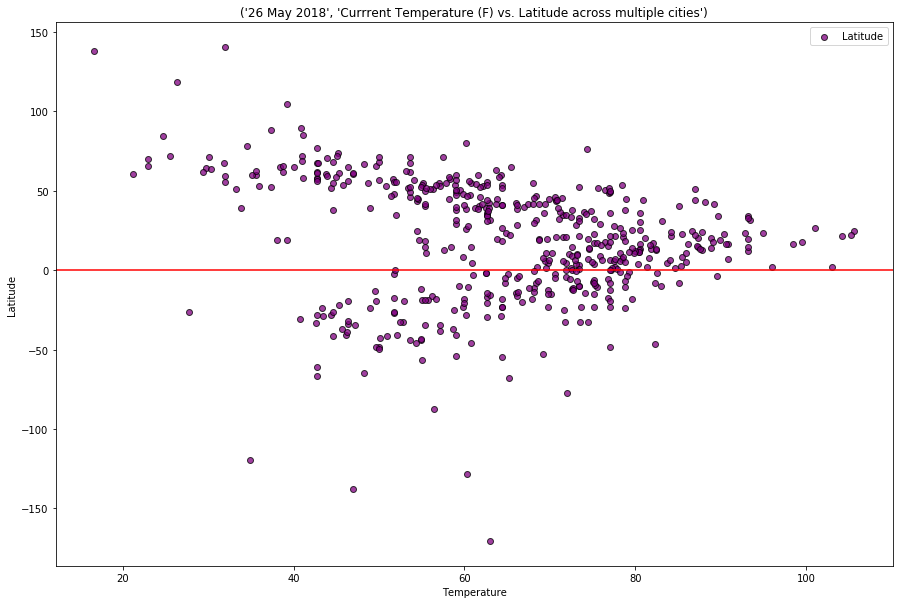

In [16]:
# Plot scatter plot with Temperature (F) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Temperature"], cityname1["Latitude"], marker="o", facecolors="purple", edgecolors="black",
    alpha=0.75)
plt.legend()
templatChartTitle = CurDate, "Currrent Temperature (F) vs. Latitude across multiple cities"

# Included a horizontal line at y = 0 to depict Equator

plt.axhline(y=0, color='r', linestyle='-')
plt.title(templatChartTitle)
plt.xlabel("Temperature")
plt.ylabel("Latitude")

plt.savefig('TempLatChartTitle.png')

In the scatter plot below, the humidity vs Latitude is depicted to check the spread.

## Conclusion: Since it is summer, the humidity is high for majority of the cities

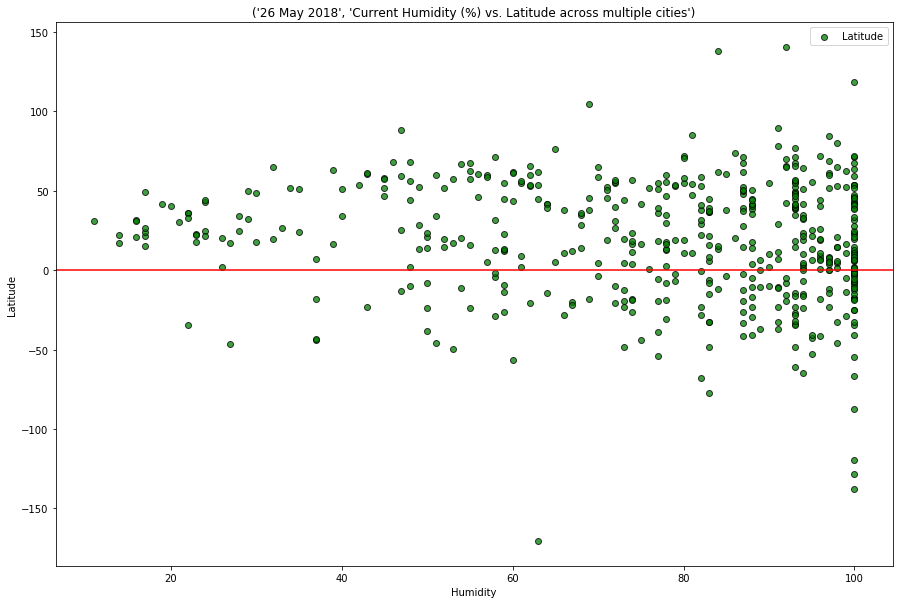

In [17]:
# Plot scatter plot with Humidity (%) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Humidity"], cityname1["Latitude"], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
HumLatChartTitle = CurDate, "Current Humidity (%) vs. Latitude across multiple cities"
plt.title(HumLatChartTitle)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig('HumLatChartTitle.png')

In the scatter plot below, the cloudiness vs Latitude is depicted to check the spread.

## Conclusion: There is no pattern in the spread of clouds

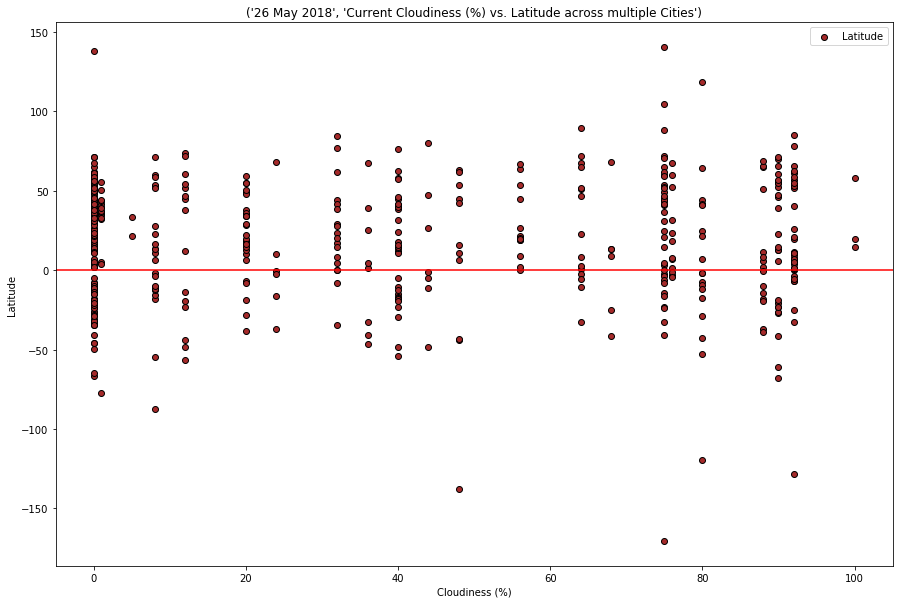

In [18]:
# Plot scatter plot with Cloudiness (%) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Cloudiness"], cityname1["Latitude"], marker="o", facecolors="brown", edgecolors="black",
            alpha=1)
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
ClouLatChartTitle = CurDate, "Current Cloudiness (%) vs. Latitude across multiple Cities"
plt.title(ClouLatChartTitle)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig('ClouLatChartTitle.png')

In the scatter plot below, the wind speed vs latitude is depicted to check the spread.

## Conclusion: The wind spead  is on the lower limit for majority of the cities

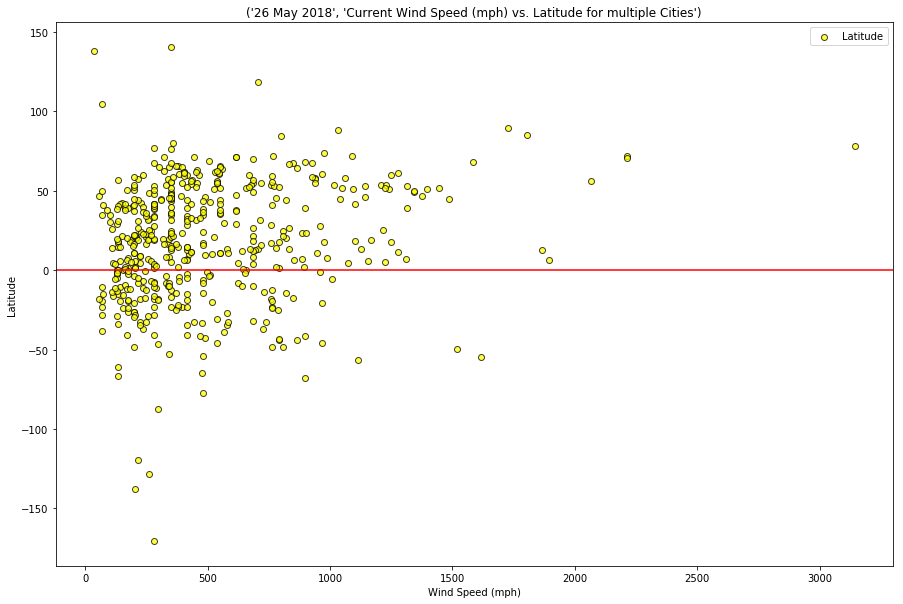

In [13]:
# Plot scatter plot with Wind Speed (mph) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Wind Speed"], cityname1["Latitude"], marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75)
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
WindLatChartTitle = CurDate, "Current Wind Speed (mph) vs. Latitude for multiple Cities"
plt.title(WindLatChartTitle)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.savefig('WindLatChartTitle.png')

In the scatter plot below, the Latitude  vs Longitude is depicted to check the spread. The horizontal line in this graph depicts the Meridian

## Observation: The random function concentrates values between -50 and 50 degress along the equator 

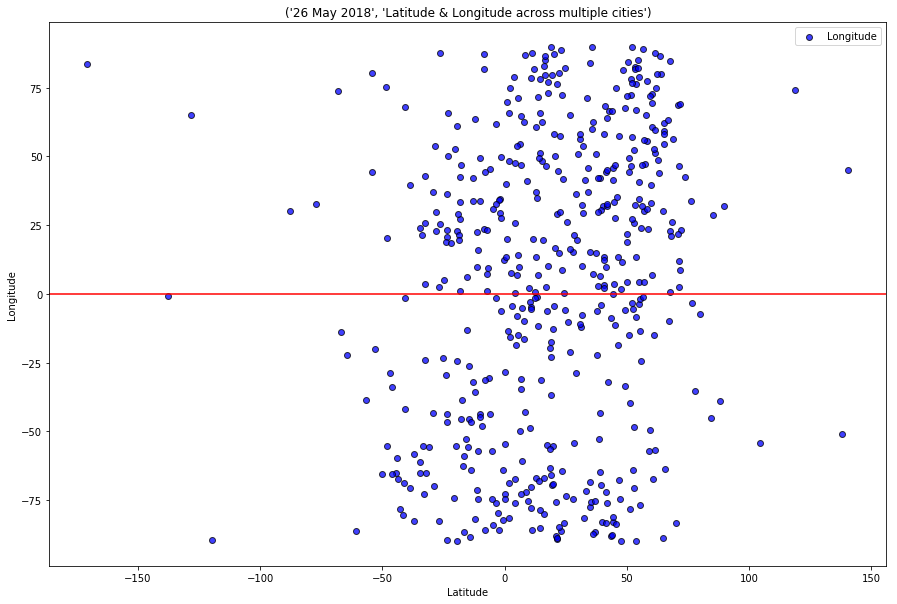

In [14]:
# Plot scatter plot with Longitude vs. Latitude to check city spread and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Latitude"], cityname1["Longitude"], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
LatLonChartTitle = CurDate, "Latitude & Longitude across multiple cities"
plt.title(LatLonChartTitle)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig('LatLonChartTitle.png')